In [62]:
import numpy as np  # библиотека для матриц и математики
import pandas as pd  # библиотека для работы с табличками
from scipy import stats  # модуль для работы со статистикой

import xlrd
import math
import scipy.stats as st
from statsmodels.stats.weightstats import ztest

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

plt.style.use('ggplot')  # стиль графиков
%matplotlib inline

In [63]:
xls = pd.ExcelFile(r'./../table.xls')
df = xls.parse(3)
df

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,64,Female,Former,21.48380,Often,1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,Female,Never,23.87631,Often,1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,Female,Former,20.01080,Not often,2372.3,83.6,19.1,14.1,257.9,6321,660,328,721
3,40,Female,Former,25.14062,No,2449.5,97.5,26.5,0.5,332.6,1061,864,153,615
4,72,Female,Never,20.98504,Often,1952.1,82.6,16.2,0.0,170.8,2863,1209,92,799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,46,Female,Former,25.89669,No,2263.6,98.2,19.4,2.6,306.5,2572,1261,164,216
311,45,Female,Never,23.82703,Often,1841.1,84.2,14.1,2.2,257.7,1665,465,80,328
312,49,Female,Never,24.26126,Often,1125.6,44.8,11.9,4.0,150.5,6943,520,300,502
313,31,Female,Former,23.45255,Often,2729.6,144.4,13.2,2.2,381.8,741,644,121,684


In [64]:
n = len(df.C9)
X = df.C9.to_numpy()

bins_number = int(1 + 3.322 * np.log10(len(X)))
h = (max(X) - min(X)) / bins_number  #ширина
bins_number, h, min(X), max(X)

(9, 22.555555555555557, 0.0, 203.0)

In [65]:
m = np.mean(X)
d = np.var(X, ddof=1)
s = np.std(X, ddof=1)
m, d, s

(3.2793650793650793, 151.8533626529168, 12.322879641257428)

In [66]:
hist, bin_edges = np.histogram(X, bins=bins_number)
bin_edges

array([  0.        ,  22.55555556,  45.11111111,  67.66666667,
        90.22222222, 112.77777778, 135.33333333, 157.88888889,
       180.44444444, 203.        ])

In [67]:
freq, division = np.histogram(X, bins=bins_number)
for i in range(len(freq)):
    print(freq[i], round(freq[i] / len(X), 3))
division


312 0.99
2 0.006
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 0.003


array([  0.        ,  22.55555556,  45.11111111,  67.66666667,
        90.22222222, 112.77777778, 135.33333333, 157.88888889,
       180.44444444, 203.        ])

In [68]:
table = {"Номер интервала": list(range(1, bins_number + 1)), "Нижняя граница": division[:-1], "Верхняя граница": division[1:],
         "Частота": freq, "Относит. частота": freq / len(X),
         "Вероятность попадания в интервал":
         stats.norm(loc=m, scale=s).cdf(division[1:]) - stats.norm(loc=m, scale=s).cdf(division[:-1])}

In [69]:
stats.norm(loc=m, scale=s).cdf(division[1:]) - stats.norm(loc=m, scale=s).cdf(division[:-1])

array([5.46048380e-01, 5.85346406e-02, 3.43506810e-04, 8.70669389e-08,
       8.60533866e-13, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [70]:
table = pd.DataFrame(table)
table

,Номер интервала,Нижняя граница,Верхняя граница,Частота,Относит. частота,Вероятность попадания в интервал
0,1,0.000000,22.555556,312,0.990476,5.460484e-01
1,2,22.555556,45.111111,2,0.006349,5.853464e-02
2,3,45.111111,67.666667,0,0.000000,3.435068e-04
3,4,67.666667,90.222222,0,0.000000,8.706694e-08
4,5,90.222222,112.777778,0,0.000000,8.605339e-13
5,6,112.777778,135.333333,0,0.000000,0.000000e+00
6,7,135.333333,157.888889,0,0.000000,0.000000e+00
7,8,157.888889,180.444444,0,0.000000,0.000000e+00
8,9,180.444444,203.000000,1,0.003175,0.000000e+00


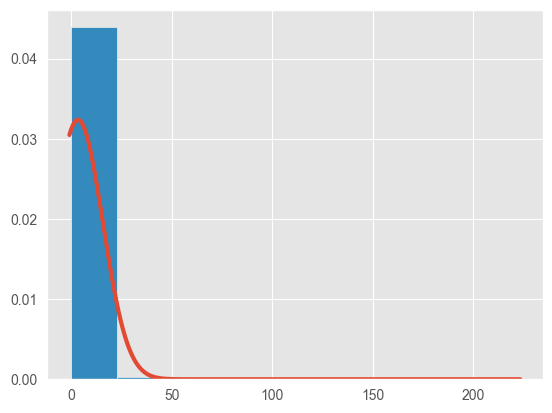

In [71]:
x = np.linspace(min(X) - 1, max(X) * 1.1, 10000)
norm_rv = st.norm(loc=m, scale=s)
pdf = norm_rv.pdf(x)

# плотность
plt.plot(x, pdf, lw=3)

plt.hist(X, bins=bins_number, density=True)
plt.show()

In [75]:
def chisquare_normal(dist, m, d, bins, ddof=2):
    counts, bins1 = np.histogram(dist, bins=bins)
    normal = (stats.norm.cdf(bins1[1:], m, d) - stats.norm.cdf(bins1[:-1], m, d)) * dist.shape[0] + np.finfo(float).eps
    Z = np.sum((counts - normal) ** 2 / normal)
    return Z, 1 - stats.chi2.cdf(Z, bins - ddof - 1)

In [76]:
chisquare_normal(X, m, s, bins_number)

(4503599627370623.0, 0.0)

### $Z = n\left(\frac{\gamma^2}{6}+\frac{\epsilon^2}{24}\right)$
### $\gamma=\frac{\hat{\mu}_3}{\hat{\sigma}^3}=\frac{\frac{1}{n} \sum_{i=1}^n\left(x_i-\bar{x}\right)^3}{\left(\frac{1}{n} \sum_{i=1}^n\left(x_i-\bar{x}\right)^2\right)^{3 / 2}}$
### $\epsilon=\frac{\hat{\mu}_4}{\hat{\sigma}^4} - 3=\frac{\frac{1}{n} \sum_{i=1}^n\left(x_i-\bar{x}\right)^4}{\left(\frac{1}{n} \sum_{i=1}^n\left(x_i-\bar{x}\right)^2\right)^2} - 3$
$\gamma - коэффициент асимметрии $
$\epsilon -коэффициент  эксцесса$
 $μ ̂_3$ третий центральный момент
 $μ ̂_4$ четвертый центральный момент
 n - число наблюдений


In [74]:
stats.jarque_bera(X)

Jarque_beraResult(statistic=632630.7365664302, pvalue=0.0)

1.0